# Project: Wrangling and Analyze Data (WeRateDogs)

##### By Olaniyan Daniel

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
   - [Twitter archive data](#Twitter_archive)
   - [Tweet image prediction](#image_prediction)
   - [Twitter API & JSON](#Twitter_API)
- [Assessing data](#assess)
   - [Visual assessment](#Visual)
   - [Programmatic assessment](#Programmatic)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)
   - [Insight one & visualization](#one)
   - [Insight two](#two)
   - [Insight three & visualization](#three)
   - [Insight four & visualization](#four)

## Introduction

<a id='intro'></a>

The purpose of this project is to practice what I learned in data wrangling section from Udacity Data Analysis Nanodegree program. The wrangled dataset is the Twitter user @dog_rates tweet archive, known as WeRateDogs.

## Data Gathering
<a id='gather'></a>

In the cell below, **all** three pieces of data for this project are gathered, and loaded in the notebook. **Note:** the methods used to gather each data are different.

#### 1. Directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
<a id='Twitter_archive'></a>

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json
import seaborn as sb

In [2]:
#Read CSV file 
archive_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive_twitter.sort_values('timestamp')
archive_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Tweet image prediction
<a id='image_prediction'></a>
Use the Requests library to download the tweet image prediction (image_predictions.tsv)

This file (image_predictions.tsv) is present in each tweet according to a neural network. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [ ]:
#URL downloaded programatically 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# Access the contents and write to a file
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    

In [4]:
#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [ ]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

consumer_key = 'YOUR CONSUMER KEY' 
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True)
#                  wait_on_rate_limit_notify = True)

**3. Twitter API & JSON**
<a id='Twitter_API'></a>

Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [ ]:
#Download Tweepy status object based on Tweet ID and store in list
tweets_list = []
# Tweets that can't be found are saved in the list below:
ids_of_tweets_not_found = []
for tweet_id in archive_twitter['tweet_id']:   
    try:
        tweets_list.append(api.get_status(tweet_id))
    except Exception as e:
        ids_of_tweets_not_found.append(tweet_id)

In [ ]:
print(f"The list of tweets {len(tweets_list)}")
print(f"The list of tweets not found {len(ids_of_tweets_not_found)}")

In [ ]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in tweets_list:
    my_list_of_dicts.append(each_json_tweet)

In [5]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'retweeted_status': retweeted_status,
                             'url': url,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                         'retweeted_status', 'url'])


In [6]:
tweet_json.head()


,tweet_id,favorite_count,retweet_count,retweeted_status,url
0,892420643555336193,38841,8601,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33266,6320,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,25063,4194,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,42214,8714,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,40361,9486,Original tweet,https://t.co/0g0KMIVXZ3


## Assessing Data
<a id='assess'></a>

In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

### Visual assessment
<a id='Visual'></a>
Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [7]:
archive_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
tweet_json

,tweet_id,favorite_count,retweet_count,retweeted_status,url
0,892420643555336193,38841,8601,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33266,6320,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,25063,4194,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,42214,8714,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,40361,9486,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...
2340,666049248165822465,109,40,Original tweet,https://t.co/4B7cOc1EDq
2341,666044226329800704,299,141,Original tweet,https://t.co/DWnyCjf2mx
2342,666033412701032449,125,44,Original tweet,https://t.co/y671yMhoiR
2343,666029285002620928,130,47,Original tweet,https://t.co/r7mOb2m0UI


### Programmatic assessment
<a id='Programmatic'></a>
Pandas' functions and/or methods are used to assess the data.

In [10]:
archive_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
sum(archive_twitter['tweet_id'].duplicated())

0

In [12]:
sum(archive_twitter['name'] == 'None')

745

In [13]:
sum(archive_twitter['rating_denominator'] > 10)

20

In [14]:
sum(archive_twitter['name'] == 'a')

55

In [15]:
archive_twitter.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [16]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1075,717047459982213120,https://pbs.twimg.com/media/CfN23ArXEAEkZkz.jpg,1,golden_retriever,0.983548,True,Labrador_retriever,0.012185,True,cocker_spaniel,0.002412,True
1213,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True
780,689977555533848577,https://pbs.twimg.com/media/CZNK7NpWwAEAqUh.jpg,1,cowboy_hat,0.291081,False,Labrador_retriever,0.179625,True,sombrero,0.121493,False
39,666649482315059201,https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg,1,Border_collie,0.447803,True,English_springer,0.170497,True,collie,0.139206,True
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
765,689143371370250240,https://pbs.twimg.com/media/CZBUO2UWsAAKehS.jpg,1,English_springer,0.303781,True,papillon,0.165132,True,Welsh_springer_spaniel,0.149051,True
1930,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
186,669363888236994561,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,1,golden_retriever,0.539004,True,Irish_setter,0.406550,True,cocker_spaniel,0.041484,True
615,680176173301628928,https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg,1,Christmas_stocking,0.207547,False,mask,0.193880,False,feather_boa,0.152738,False


In [18]:
sum(image_prediction.jpg_url.duplicated())

66

In [19]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2345 non-null   object
 1   favorite_count    2345 non-null   int64 
 2   retweet_count     2345 non-null   int64 
 3   retweeted_status  2345 non-null   object
 4   url               2345 non-null   object
dtypes: int64(2), object(3)
memory usage: 91.7+ KB


In [21]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,retweeted_status,url
1061,739979191639244800,21390,6512,Original tweet,https://t.co/7AKdkCOlMf
912,755955933503782912,7938,3196,Original tweet,https://t.co/GAYViEweWr
267,840698636975636481,194,3,Original tweet,n
2261,667491009379606528,549,237,Original tweet,https://t.co/ITxxcc4v9y
2086,670733412878163972,997,537,Original tweet,https://t.co/NsDIt8Z80Z
1852,675372240448454658,1799,545,Original tweet,https://t.co/IyAXinfyju
746,778650543019483137,6301,1680,Original tweet,https://t.co/SS4TsHlPUG
434,819347104292290561,7853,1348,Original tweet,https://t.co/YGAv4jBs5A
1713,680085611152338944,13665,9776,Original tweet,https://t.co/etzLo3sdZE
742,778990705243029504,21847,8188,Original tweet,https://t.co/vyx1X5eyWI


In [22]:
tweet_json.retweeted_status.value_counts()

Original tweet       2175
This is a retweet     170
Name: retweeted_status, dtype: int64

In [25]:
tweet_json.tail()

,tweet_id,favorite_count,retweet_count,retweeted_status,url
2340,666049248165822465,109,40,Original tweet,https://t.co/4B7cOc1EDq
2341,666044226329800704,299,141,Original tweet,https://t.co/DWnyCjf2mx
2342,666033412701032449,125,44,Original tweet,https://t.co/y671yMhoiR
2343,666029285002620928,130,47,Original tweet,https://t.co/r7mOb2m0UI
2344,666020888022790149,2562,518,Original tweet,https://t.co/BLDqew2Ijj


<a id='quality'></a>
### Quality issues
*Completeness, validity, accuracy, consistency*

#### twitter_archive
1. keep original ratings (no retweets) that have images.

2. Name is actually not a proper name like 745 Dogs name with None and 55 dogs with names 'a'

3. Missing expanded_urls

4. Separate timestamp into day - month - year (3 columns)

5. Incorrect rating_numerators and rating_denominators

#### image_prediction
6. Image Prediction jpg_url contains 66 duplicates

7. Mising data (only has 2075 entries instead of 2356)

#### tweet_json

8. Keep original tweets only

<a id='tidiness'></a>
### Tidiness issues
1. The dog type, doggo, floofer, pupper and puppo should be a single column instead of 4 coulumns.

2. The 3 data set twitter_archive, image_prediction and tweet_json should be a single dataset. 

<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [26]:
# Make copies of original pieces of data

archive_twitter_clean = archive_twitter.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1:

#### Define 
Delete retweets by filtering the NaN of retweeted_status_user_id

#### Code

In [27]:
archive_twitter_clean = archive_twitter_clean[pd.isnull(archive_twitter_clean['retweeted_status_user_id'])]

#### Test

In [28]:
print(sum(archive_twitter_clean.retweeted_status_user_id.value_counts()))

0


### Issue #2:

#### Define 
Set 'a' to None

#### Code

In [29]:
archive_twitter_clean['name'] = (archive_twitter_clean['name']).replace(['a'], 'None')

#### Test

In [30]:
# test if theres 'a' names
print(sum(archive_twitter_clean['name'] == 'a'))
'a' in archive_twitter_clean['name']


0


False

### Issue #3:

#### Define
use tweet_id to get expanded_urls

#### Code

In [31]:
# if expanded_urls is null, add by using tweet_id
def append_urls(row):
#     skip if expanded_urls is not null
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        #Get tweet_id
        tweet_id = row['tweet_id']
        #create new URLS and appendinto expanded_urls
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        return row
    
# save dataframes with empty expanded_urls
archive_twitter_clean = archive_twitter_clean.apply(append_urls, axis=1)
        

#### Test

In [32]:
# check that there is no expanded_urls that is null
sum(archive_twitter_clean['expanded_urls'].isnull())

0

### Issue #4:

#### Define
Separate timestamp into day - month - year (3 columns)

#### Code

In [34]:
#CODE: convert timestamp to datetime
archive_twitter_clean['timestamp'] = pd.to_datetime(archive_twitter_clean['timestamp'])

#extract year, month and day to new columns
archive_twitter_clean['day'] = archive_twitter_clean['timestamp'].dt.day
archive_twitter_clean['month'] = archive_twitter_clean['timestamp'].dt.month
archive_twitter_clean['year'] = archive_twitter_clean['timestamp'].dt.year

#Finally drop timestamp column
archive_twitter_clean = archive_twitter_clean.drop('timestamp', 1)


C:\Users\OLANIY~1\AppData\Local\Temp/ipykernel_7700/3166340098.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  archive_twitter_clean = archive_twitter_clean.drop('timestamp', 1)


#### Test

In [35]:
print(list(archive_twitter_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'day', 'month', 'year']


### Issue #5:

#### Define
Correct Numerators

#### Code

In [36]:
# Change numerator and denominators type from int to float to allow decimals 
archive_twitter_clean[['rating_numerator', 'rating_denominator']] = archive_twitter_clean[['rating_numerator','rating_denominator']].astype(float)

archive_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source                      2175 non-null   object 
 4   text                        2175 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      float64
 8   expanded_urls               2175 non-null   object 
 9   rating_numerator            2175 non-null   float64
 10  rating_denominator          2175 non-null   float64
 11  name                        2175 non-null   object 
 12  doggo                       2175 non-null   object 
 13  floofer                     2175 

In [37]:
#Update numerators

archive_twitter_clean.loc[(archive_twitter_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
archive_twitter_clean.loc[(archive_twitter_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_twitter_clean.loc[(archive_twitter_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_twitter_clean.loc[(archive_twitter_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_twitter_clean.loc[(archive_twitter_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5

#### Test

In [38]:
with pd.option_context('max_colwidth', 200):
    display(archive_twitter_clean[archive_twitter_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]  
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\OLANIY~1\AppData\Local\Temp/ipykernel_7700/4130760694.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(archive_twitter_clean[archive_twitter_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### Issue #6:

#### Define
Drop 66 Image Prediction jpg_url duplicates

#### Code

In [39]:
print(list(image_prediction_clean))

#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)


image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


C:\Users\OLANIY~1\AppData\Local\Temp/ipykernel_7700/3996149592.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1',


#### Test

In [40]:
print(list(image_prediction_clean))

sum(image_prediction_clean['jpg_url'].duplicated())

['tweet_id', 'jpg_url']


0

### Issue #7:

#### Define
Delete columns that won't be used for analysis

#### Code

In [41]:
archive_twitter_clean = archive_twitter_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    ], 1)

C:\Users\OLANIY~1\AppData\Local\Temp/ipykernel_7700/3222690355.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  archive_twitter_clean = archive_twitter_clean.drop(['source',


#### Test

In [42]:
print(list(archive_twitter_clean))

['tweet_id', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'day', 'month', 'year']


### Issue #8:

#### Define
Melt the different dog stages, doggo, floofer, pupper and puppo columns to dogs and dogs_stages column. Then drop dogs. 
Sort by dog_stages and then drop duplicated based on tweet_id leaving the last occurrence.

#### Code

In [43]:
# Create a new column called dog_stages for the [doggo, floofer, pupper and puppo] columns of dogs
archive_twitter_clean['dog'] = 'None'

#Function to melt all the dog stages to one column
def get_dog_stages(row):
#     keep all dog stages()
    dog_stages = []
    
    # Record all dog stages which are provided
    if row['doggo'] == 'doggo':
        dog_stages.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stages.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stages.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stages.append('puppo')
        
    if len(dog_stages) < 1: #if list is empty, set to 'None'
        row['dog_stages'] = 'None'
    else:
        row['dog_stages'] = ','.join(dog_stages)
        
    return row

#Apply to all rows
archive_twitter_clean = archive_twitter_clean.apply(get_dog_stages, axis=1)

#Drop the redundant columns
archive_twitter_clean = archive_twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


#### Test

In [44]:
archive_twitter_clean.dog_stages.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stages, dtype: int64

### Issue #9:

#### Define
Keep original tweets only

#### Code

In [45]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#### Test

In [46]:
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2175
Name: retweeted_status, dtype: int64

### Issue #10

#### Define
Create a new column with rating in float type to avoid converting all int column to float

#### Code

In [47]:
archive_twitter_clean['rating'] = 10 * archive_twitter_clean['rating_numerator'] / archive_twitter_clean['rating_denominator'].astype(float)

#### Test

In [48]:
archive_twitter_clean.sample(5)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,day,month,year,dog,dog_stages,rating
673,789628658055020548,This is Eli. He can fly. 13/10 magical af http...,https://twitter.com/dog_rates/status/789628658...,13.0,10.0,Eli,22,10,2016,None,None,13.0
1552,688916208532455424,This pupper just wants to say hello. 11/10 wou...,https://twitter.com/dog_rates/status/688916208...,11.0,10.0,None,18,1,2016,None,pupper,11.0
873,761334018830917632,This is Bruce. I really want to hear the joke ...,https://twitter.com/dog_rates/status/761334018...,10.0,10.0,Bruce,4,8,2016,None,None,10.0
1958,673580926094458881,When you ask your professor about extra credit...,https://twitter.com/dog_rates/status/673580926...,8.0,10.0,None,6,12,2015,None,None,8.0
1795,677314812125323265,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,10.0,10.0,Tassy,17,12,2015,None,None,10.0


### Issue #11:

#### Define
create a new dataframe that merge archive_twitter_clean and image_prediction_clean

#### Code

In [49]:
twitter_data1 = pd.merge(archive_twitter_clean, 
                       image_prediction_clean,
                       how = 'left', on = ['tweet_id'])

# keep rows that have picture (jpg_url)
twitter_data1 = twitter_data1[twitter_data1['jpg_url'].notnull()]


#### Test

In [50]:
twitter_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 2174
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1928 non-null   int64  
 1   text                1928 non-null   object 
 2   expanded_urls       1928 non-null   object 
 3   rating_numerator    1928 non-null   float64
 4   rating_denominator  1928 non-null   float64
 5   name                1928 non-null   object 
 6   day                 1928 non-null   int64  
 7   month               1928 non-null   int64  
 8   year                1928 non-null   int64  
 9   dog                 1928 non-null   object 
 10  dog_stages          1928 non-null   object 
 11  rating              1928 non-null   float64
 12  jpg_url             1928 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 210.9+ KB


### Issue #12

#### Define
change tweet_id from int to str

#### Code

In [51]:
twitter_data1['tweet_id'] = twitter_data1['tweet_id'].astype('str')

#### Test

In [52]:
twitter_data1['tweet_id'].dtypes

dtype('O')

### Issue #13:

#### Define
create a new dataframe that merge twitter_data and tweet_json_clean

####  Code

In [53]:
twitter_data = pd.merge(twitter_data1, tweet_json_clean,
                      how = 'left', on = ['tweet_id'])

#### Test

In [54]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1928 non-null   object 
 1   text                1928 non-null   object 
 2   expanded_urls       1928 non-null   object 
 3   rating_numerator    1928 non-null   float64
 4   rating_denominator  1928 non-null   float64
 5   name                1928 non-null   object 
 6   day                 1928 non-null   int64  
 7   month               1928 non-null   int64  
 8   year                1928 non-null   int64  
 9   dog                 1928 non-null   object 
 10  dog_stages          1928 non-null   object 
 11  rating              1928 non-null   float64
 12  jpg_url             1928 non-null   object 
 13  favorite_count      1928 non-null   int64  
 14  retweet_count       1928 non-null   int64  
 15  retweeted_status    1928 non-null   object 
 16  url   

<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
#Store the clean DataFrame in a CSV file
twitter_data.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [56]:
twitter_data.describe()

,rating_numerator,rating_denominator,day,month,year,rating,favorite_count,retweet_count
count,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000
mean,12.248330,10.550311,16.053423,7.143672,2015.841286,11.639840,8255.170124,2470.637448
std,42.174881,7.444349,8.940485,4.129784,0.701926,41.332642,11680.698852,4190.479866
min,0.000000,2.000000,1.000000,1.000000,2015.000000,0.000000,79.000000,13.000000
25%,10.000000,10.000000,8.000000,3.000000,2015.000000,10.000000,1827.000000,592.000000
50%,11.000000,10.000000,16.000000,7.000000,2016.000000,11.000000,3816.500000,1261.500000
75%,12.000000,10.000000,24.000000,11.000000,2016.000000,12.000000,10096.000000,2819.250000
max,1776.000000,170.000000,31.000000,12.000000,2017.000000,1776.000000,143519.000000,77435.000000


In [57]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1928 non-null   object 
 1   text                1928 non-null   object 
 2   expanded_urls       1928 non-null   object 
 3   rating_numerator    1928 non-null   float64
 4   rating_denominator  1928 non-null   float64
 5   name                1928 non-null   object 
 6   day                 1928 non-null   int64  
 7   month               1928 non-null   int64  
 8   year                1928 non-null   int64  
 9   dog                 1928 non-null   object 
 10  dog_stages          1928 non-null   object 
 11  rating              1928 non-null   float64
 12  jpg_url             1928 non-null   object 
 13  favorite_count      1928 non-null   int64  
 14  retweet_count       1928 non-null   int64  
 15  retweeted_status    1928 non-null   object 
 16  url   

### Insights:
1. The dog Stage which occurs the most is the Pupper which accounts for 70% while the least is Floofer which is 2%

2. Rating Score '12' occured the most (435 times) 

3. The mean rating score is 11.639840

### Visualization

#### Visualization 1 

##### Motivation
- Proportion of the different Dog Stages Present

In [58]:
twitter_data[twitter_data['dog_stages'] == 'pupper'].count()['dog_stages']

199

In [59]:
twitter_data[twitter_data['dog_stages'] == 'puppo'].count()['dog_stages']

21

In [60]:
twitter_data[twitter_data['dog_stages'] == 'doggo'].count()['dog_stages']

59

In [61]:
twitter_data[twitter_data['dog_stages'] == 'floofer'].count()['dog_stages']

7

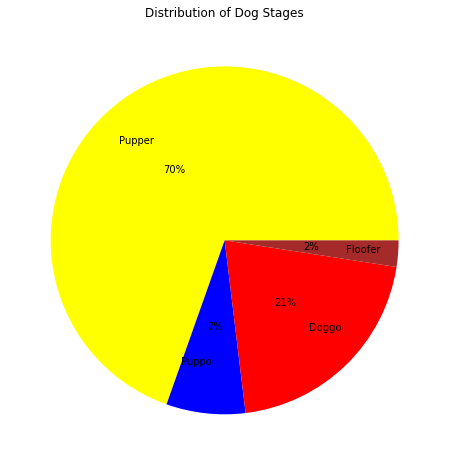

In [62]:
plt.figure(figsize=(8,8))
plt.pie(x=[199,21,59,7], labels=['Pupper','Puppo','Doggo','Floofer'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['yellow','b','r','brown'])
plt.title('Distribution of Dog Stages')

plt.savefig('Output1.png',bbox_inches='tight');

In [63]:
dog_stages_count = twitter_data.groupby('rating').count()
dog_stages_count

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,day,month,year,dog,dog_stages,jpg_url,favorite_count,retweet_count,retweeted_status,url
rating,,,,,,,,,,,,,,,,
0.000000,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1.000000,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2.000000,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
3.000000,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
4.000000,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
5.000000,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
6.000000,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
6.363636,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7.000000,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
